# San Francisco AirBnb Exploratory Data Analysis (EDA)

## Analysis - Airbnb Reviews

In [180]:
import pandas as pd
dfSF = pd.read_csv("SFclean_data.csv")
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month
0,1094764,San Francisco Presidio Paradise!,NaN,NaN,172460,we are from the san francisco bay area and sti...,within a day,f,2,6,t,Inner Richmond,37.788140,-122.465470,Entire rental unit,Entire home/apt,2,NaN,1.0,[],$150.00,30,60,1,0,5.00,5.00,5.00,5.00,5.00,5.00,2,4.855811e+17,10/31/21,the place has charm filled with love and life...,2021-10-31,135
1,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.00,5.00,2,7.088137e+17,9/4/22,one of the best airbnbs i ve stayed at the en...,2022-09-04,46
2,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.00,5.00,2,7.341638e+17,10/9/22,i had a perfect stay looks exactly like the p...,2022-10-09,47
3,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.00,5.00,2,7.718383e+17,11/30/22,very responsive team the landlords stay downs...,2022-11-30,48
4,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.00,5.00,2,9.580447e+17,8/14/23,loved our stay thank you so much,2023-08-14,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,47682,One-bedroom apt. Lafayette Park,NaN,NaN,216682,originally from new york i work in healthcar...,within a few hours,f,9,9,t,Pacific Heights,37.791860,-122.424290,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Hot water kettle"", ""Iron"", ""Refrigerator"", ""...",$108.00,7,30,35,0,4.86,4.82,4.73,4.91,4.91,4.86,4,6.927925e+17,8/13/22,jay s place was clean easy to access and sup...,2022-08-13,144
314118,47682,One-bedroom apt. Lafayette Park,NaN,NaN,216682,originally from new york i work in healthcar...,within a few hours,f,9,9,t,Pacific Heights,37.791860,-122.424290,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Hot water kettle"", ""Iron"", ""Refrigerator"", ""...",$108.00,7,30,35,0,4.86,4.82,4.73,4.91,4.91,4.86,4,9.567009e+17,8/12/23,the apartment is spacious the location is saf...,2023-08-12,156
314119,29039496,Excellent 1 Bedroom

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk_stopwords = nltk.corpus.stopwords.words("english") # Create a list of stop words from nltk (for the vectorizer to remove)
nltk_stopwords = nltk_stopwords + ["br"]

vectorizer = CountVectorizer(stop_words = nltk_stopwords, 
                                   max_df = 0.99,
                                   min_df = 0.01)

DTM_SF = vectorizer.fit_transform(dfSF["comments"])

#Check your answer:
DTM_SF.shape

(314122, 390)

#### Term Frequency

In [93]:
## Get term frequency ##

from collections import Counter              # for word counting

dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_SF.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,great,197905
1,place,173265
2,stay,165478
3,location,110094
4,clean,97983
5,would,73987
6,nice,65501
7,host,64883
8,comfortable,61405
9,room,60541


#### TFIDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(stop_words = nltk_stopwords, ngram_range = (2,2), max_df = 0.99, min_df = 0.01)
DTM_SF2 = vectorizer2.fit_transform(dfSF["comments"])
pd.DataFrame(DTM_SF2.toarray(), columns = vectorizer2.get_feature_names_out())

DTM_SF2.shape

(314122, 80)

In [95]:
dffreq = pd.DataFrame({'Term': vectorizer2.get_feature_names_out(),
                   'Frequency': DTM_SF2.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,great location,20828.012764
1,san francisco,18039.257270
2,great place,12923.680663
3,highly recommend,11753.345288
4,place stay,11734.014239
5,would definitely,10159.716113
6,great host,9126.257400
7,great stay,9063.986376
8,definitely stay,8135.873542
9,walking distance,7884.964974


### BK Airbnb Sentiment Scores

In [96]:
from textblob import TextBlob
dfSF["review_TextBlob"]=[TextBlob(s).sentiment.polarity for s in dfSF.comments]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfSF["review_VADER"]=[analyzer.polarity_scores(s)['compound'] for s in dfSF.comments]

#Check you answer
dfSF.head(10)

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER
0,1094764,San Francisco Presidio Paradise!,NaN,NaN,172460,we are from the san francisco bay area and sti...,within a day,f,2,6,t,Inner Richmond,37.788140,-122.465470,Entire rental unit,Entire home/apt,2,NaN,1.0,[],$150.00,30,60,1,0,5.00,5.00,5.00,5.00,5.0,5.00,2,4.855811e+17,10/31/21,the place has charm filled with love and life...,2021-10-31,135,0.357143,0.9337
1,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.0,5.00,2,7.088137e+17,9/4/22,one of the best airbnbs i ve stayed at the en...,2022-09-04,46,0.361970,0.9654
2,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.0,5.00,2,7.341638e+17,10/9/22,i had a perfect stay looks exactly like the p...,2022-10-09,47,0.413889,0.9349
3,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.0,5.00,2,7.718383e+17,11/30/22,very responsive team the landlords stay downs...,2022-11-30,48,0.350000,0.9183
4,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.0,5.00,2,9.580447e+17,8/14/23,loved our stay thank you so much,2023-08-14,57,0.450000,0.7506
5,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,this house is well maintained and has upgrade...,the neighborhood is on a quiet street with fam...,226555948,our company is called luxo stays based in the ...,within an hour,f,69,103,t,Excelsior,37.726761,-122.408522,Private room in home,Private room,2,2.5,1.0,"[""Hot water kettle"", ""Bathtub"", ""Iron"", ""Keypa...",$69.00,0,0,6,0,5.00,4.83,4.50,5.00,5.0,5.00,2,1.042174e+18,12/8/23,gi angelo is a wonderful host i would definit...,2023-12-08,61,0.666667,0.9118
6,938317240177880784,Presidio Heights Condo - 2bdrm/2 bath,relax in very well appointed two bedroom two b...,quiet neighborhood with everything you need wi...,51769509,single early riser very clean,within a few hours,t,1,1,t,Presidio Heights,37.789860,-122.450940,Entire condo,Entire home/apt,4,2.0,2.0,"[""Thermador stainless steel single oven"", ""Cen...",$328.00,1,5,12,

### Sentiment Visualization

In [182]:
# Set time variable
dfSF.dropna(subset=["date"], inplace = True)
dfSF["timestamp"] = pd.to_datetime(dfSF["date"], format="%m/%d/%y")

dfSF.sort_values(by = ["timestamp"], ascending = True, inplace = True)
dfSF.reset_index(drop = True, inplace = True)

#Check your answer
print(dfSF["timestamp"][0:15])

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
5    2016-01-01
6    2016-01-01
7    2016-01-01
8    2016-01-01
9    2016-01-01
10   2016-01-01
11   2016-01-01
12   2016-01-01
13   2016-01-01
14   2016-01-01
Name: timestamp, dtype: datetime64[ns]


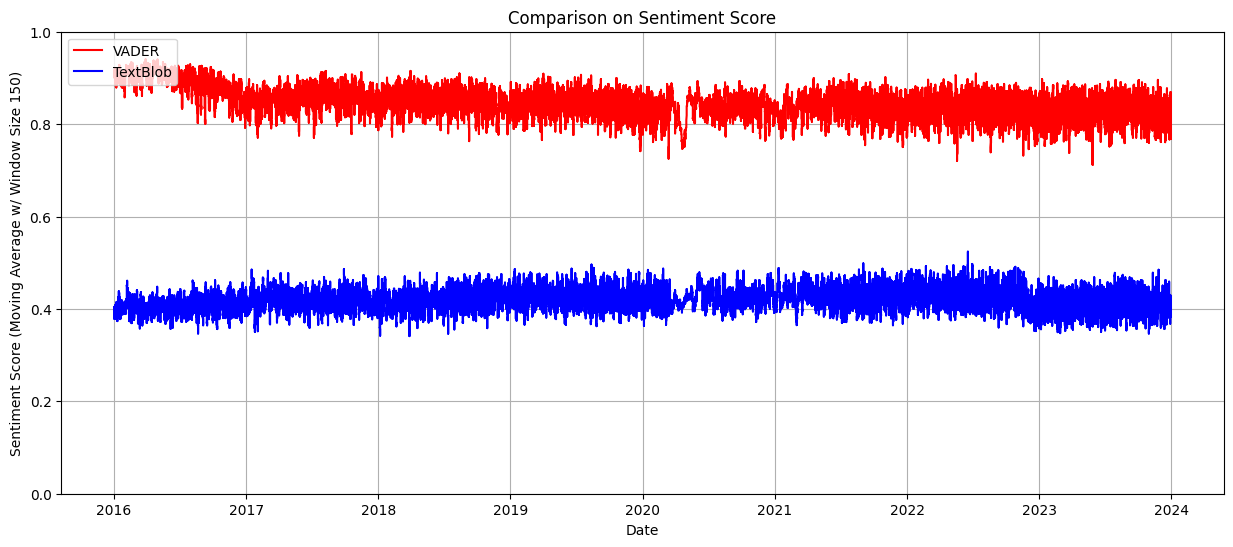

In [99]:
# Visualizing sentiment - VADER
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

plt.figure(figsize=(15, 6))

plt.plot(dfSF.timestamp, dfSF.review_VADER.rolling(window=100).mean(), "-r", label = "VADER")
plt.plot(dfSF.timestamp, dfSF.review_TextBlob.rolling(window=100).mean(), "-b", label = "TextBlob")

plt.ylim(0, 1)
plt.legend(loc = "upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average w/ Window Size 150)")
plt.grid(axis = 'both')

plt.show()

## Text Visualization

### Word Cloud

In [100]:
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer = CountVectorizer(stop_words=nltk_stopwords)

DTM_SF = vectorizer.fit_transform(dfSF["comments"])

dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_SF.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(15)

,Term,Frequency
0,great,197905
1,place,173265
2,stay,165478
3,location,110094
4,clean,97983
5,br,89637
6,would,73987
7,nice,65501
8,host,64883
9,comfortable,61405


In [101]:
# Generate dictionary for word cloud
dictfreq = dict(zip(dffreq.Term,dffreq.Frequency))


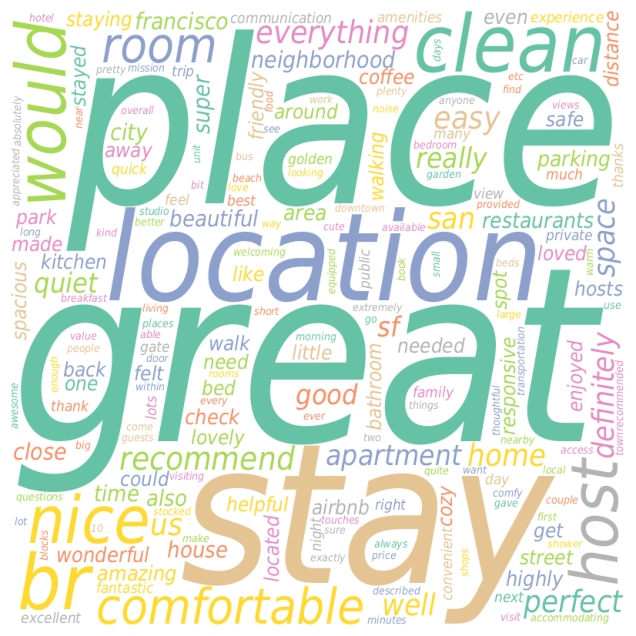

In [102]:
#Initialize a wordcloud object
import matplotlib.pyplot as plt                      
wordcloud = WordCloud(width = 800, height = 800, 
                font_path="DejaVuSansCondensed-Oblique", 
                background_color ='white',
                prefer_horizontal=0.9,   
                colormap='Set2', 
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

In [103]:
temp_date = pd.to_datetime("2023-01-01")
dfSF2023 = dfSF[dfSF["timestamp"] >= temp_date]

### Two-Mode Text Network

In [212]:
temp_date = pd.to_datetime("2023-01-01")
df2023 = dfSF[dfSF["timestamp"] >= temp_date]
df_sample = df2023.sample(n=10000, random_state = 2021) 
df_sample = df_sample[["neighbourhood_cleansed","comments"]]

df_sample = df_sample[df_sample.neighbourhood_cleansed.isin(df_sample.neighbourhood_cleansed.value_counts().index)] 
df_sample.reset_index(drop=True, inplace=True)
print(df_sample.neighbourhood_cleansed.value_counts())
df_sample.head()

neighbourhood_cleansed
Outer Sunset             1032
Mission                   639
Western Addition          599
Castro/Upper Market       526
Outer Richmond            525
Bernal Heights            499
Downtown/Civic Center     425
South of Market           417
Marina                    391
Parkside                  376
Inner Richmond            370
Noe Valley                358
Excelsior                 320
Haight Ashbury            309
Potrero Hill              303
Outer Mission             291
Bayview                   278
Inner Sunset              265
Nob Hill                  230
Ocean View                216
Visitacion Valley         201
West of Twin Peaks        192
Chinatown                 182
North Beach               168
Pacific Heights           147
Financial District        127
Russian Hill              126
Lakeshore                 109
Crocker Amazon            103
Glen Park                  99
Twin Peaks                 74
Seacliff                   35
Presidio Heights 

,neighbourhood_cleansed,comments
0,Diamond Heights,we had a wonderful stay and would definitely d...
1,Noe Valley,fantastic stay in noe valley jim was very hel...
2,Bayview,great place and easy to find
3,Crocker Amazon,we really enjoyed staying at donna s home the...
4,Noe Valley,i will be back again and again and again such...


In [213]:
# set row index
df_sample.set_index("neighbourhood_cleansed",inplace=True)


In [188]:
df_sample

,comments
neighbourhood_cleansed,
Castro/Upper Market,jason and patrick were fantastic hosts super ...
Castro/Upper Market,really great experience judy could not have b...
Parkside,i enjoyed my stay at candy s place it was pea...
Nob Hill,for the price point if you re trying to save ...
Outer Mission,i rented dawn s place for my parents who were ...
...,...
Marina,nice and quaint stay in a great location tha...
Lakeshore,stayed here a few times and this is my go to w...
Outer Sunset,ken was an amazing host he made our first exp...


In [214]:
import textnets as tn
corpus = tn.Corpus(df_sample["comments"])
DTM = corpus.tokenized()

#Check your answer
DTM[0:10]

/home/httrinh/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 9964 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/36 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bayview,12min,1,1.556303
Bayview,30am,1,0.857332
Bayview,4wd,1,1.556303
Bayview,able,6,0.044140
Bayview,abnormally,1,1.556303
Bayview,absolute,2,0.361099
Bayview,absolutely,9,0.073848
Bayview,ac,2,0.669913
Bayview,access,14,0.081099


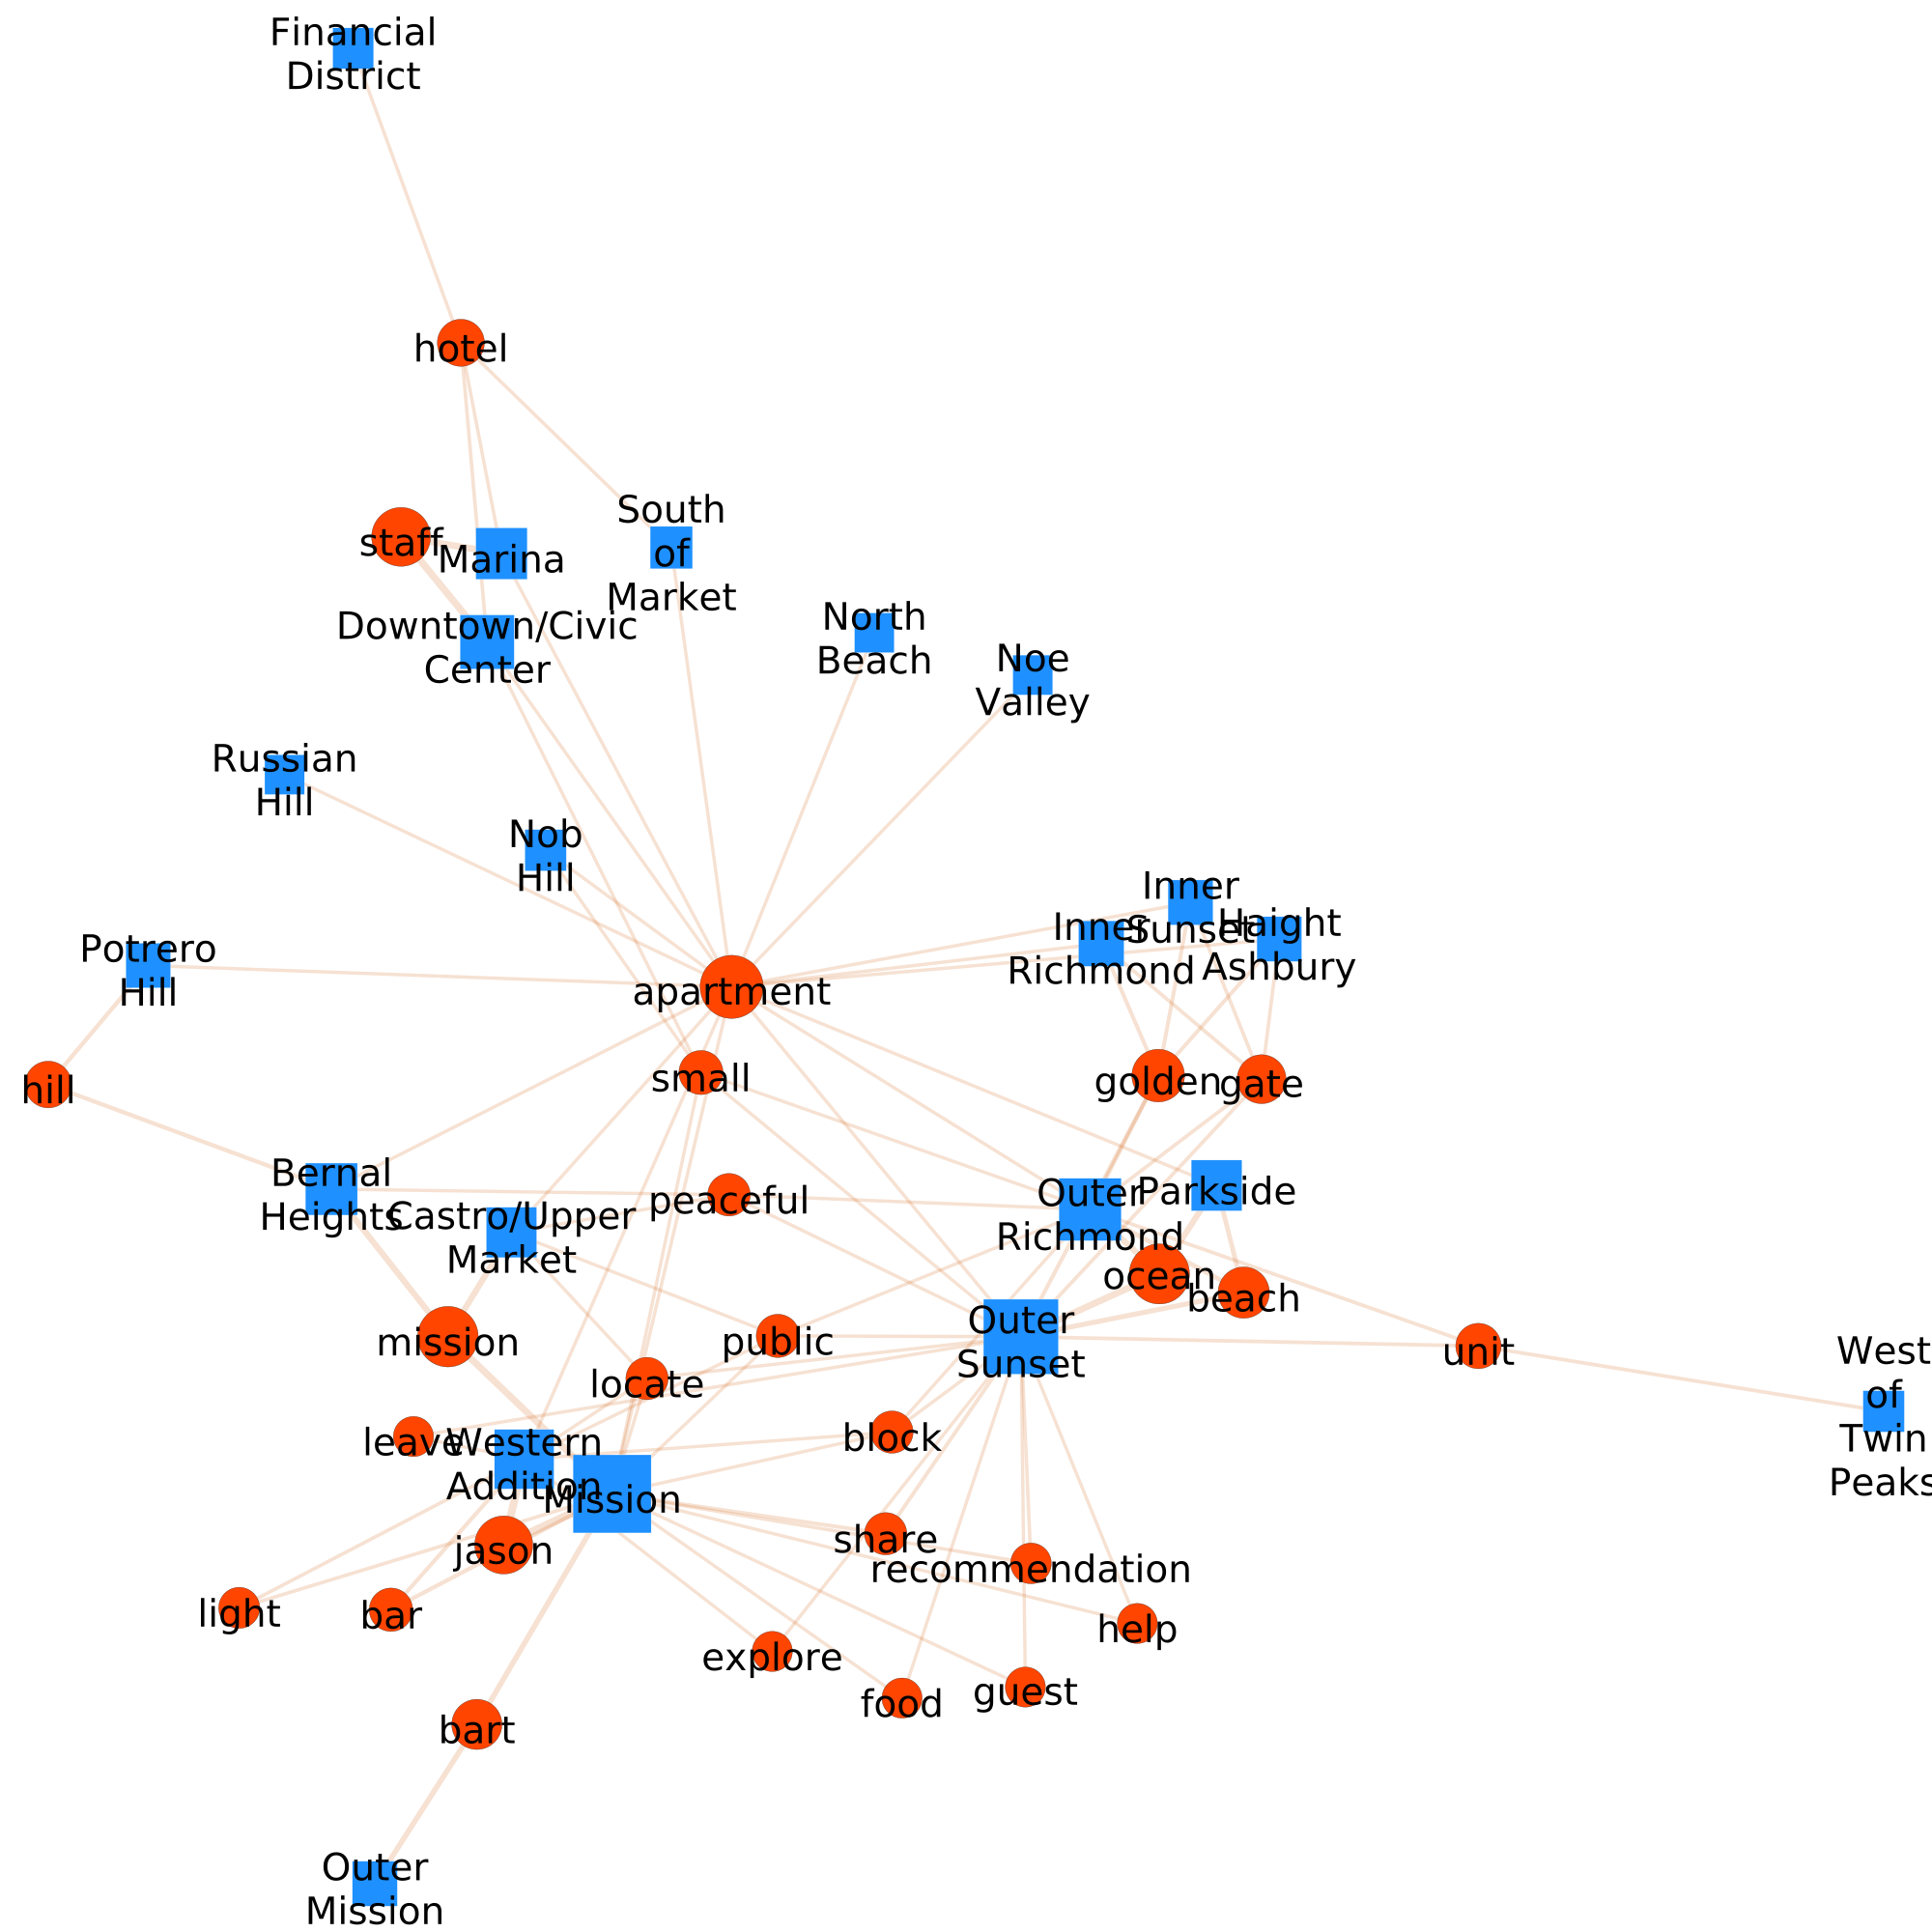

In [220]:
#Your answer here
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=25) & (DTM["term_weight"]>0.12)] #make the DTM smaller for better visualization
net = tn.Textnet(DTM_small)
net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=50,
        vertex_label_size=39, 
        edge_width=5,           # Width of edges
        edge_label_size=18,      # Size of edge labels 
        edge_color="chocolate",     # Color of edges 
        edge_opacity=0.2,
        scale_nodes_by="birank",
        scale_edges_by="weight",
        bbox=[2000,2000],
        target="SF_network2000.png")

### Most negative reviews

In [157]:
dfSF_neg = dfSF.sort_values(by='review_VADER').head(5000)


In [160]:
dfSF_neg = dfSF_neg[dfSF_neg.neighbourhood_cleansed.isin(dfSF_neg.neighbourhood_cleansed.value_counts().index)] 
dfSF_neg.reset_index(drop=True, inplace=True)
print(dfSF_neg.neighbourhood_cleansed.value_counts())
dfSF_neg.head()

neighbourhood_cleansed
Downtown/Civic Center    553
Financial District       338
Outer Sunset             337
South of Market          274
Mission                  251
Western Addition         231
Marina                   231
Outer Richmond           209
Haight Ashbury           201
Excelsior                195
Inner Richmond           183
Bernal Heights           183
Castro/Upper Market      148
Parkside                 146
Bayview                  142
Nob Hill                 128
Potrero Hill             125
Pacific Heights          122
Noe Valley               109
North Beach              104
West of Twin Peaks       103
Outer Mission             98
Inner Sunset              89
Chinatown                 83
Visitacion Valley         72
Russian Hill              67
Ocean View                62
Crocker Amazon            59
Lakeshore                 52
Glen Park                 35
Twin Peaks                21
Presidio Heights          20
Diamond Heights           13
Seacliff            

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,description_exists,neighborhood_overview_exists,host_about_exists,desc_VADER1,desc_VADER2
0,18718406,Dolores Park,minimum 30 day stay great location walk sc...,NaN,58350764,NaN,NaN,f,1,7,t,Castro/Upper Market,37.76165,-122.42766,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Single level home"", ""Private entrance"", ""Bat...",$99.00,29,59,3,0,3.67,3.33,3.67,3.67,4.33,3.33,1,6.848273e+17,8/2/22,i debated writing this review because the prop...,2022-08-02,78,-0.006435,-0.9959,0.6249,0.6249,0.0000,0.5000,0.0000,0.5000,1,0,0,0.6249,0.6249
1,20663782,Amazing Marina/Cow Hollow 3 Bd 2 full bath,3 bedroom 2 full bath cow hollow flat approx...,cow hollow is between the marina and pacific h...,18197535,NaN,within a few hours,f,1,2,t,Marina,37.80077,-122.42981,Entire serviced apartment,Entire home/apt,6,2.0,3.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Eleva...",$250.00,30,60,16,0,4.69,4.63,4.63,4.44,4.75,4.44,1,7.196296e+17,9/19/22,do not stay here if you value sleep we stayed...,2022-09-19,98,-0.088988,-0.9921,0.3586,0.3586,0.8316,0.8316,0.0000,0.5000,1,1,0,0.3586,0.3586
2,5027016,Cozy Studio by Beach & Golden Gate Park,spacious studio in the beautiful sunset distri...,the sunset is a safe and relaxing neighborhood...,25943995,san francisco resident for over ten years lo...,within a few hours,f,3,3,t,Outer Sunset,37.75780,-122.50294,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Single level home"", ""Private entrance"", ""Hot...",$100.00,29,59,110,0,4.49,4.62,4.73,4.82,4.69,4.52,3,9.970805e+07,9/5/16,this is the first time i ve had a bad experien...,2016-09-05,20,-0.069054,-0.9918,0.9246,0.9246,0.9698,0.9698,0.9823,0.9823,1,1,1,0.9246,0.9246
3,50733860,Adorable 1 bedroom guesthouse with patio,kick back and relax in this calm stylish space,NaN,259056393,NaN,within a few hours,t,1,1,t,Potrero Hill,37.75750,-122.40179,Entire guesthouse,Entire home/apt,4,1.0,1.0,"[""Single level home"", ""HDTV with Fire TV, stan...",$170.00,0,0,9,0,4.67,4.33,4.00,4.67,4.67,4.56,1,7.834134e+17,12/16/22,this guest house was subpar the space is self...,2022-12-16,44,-0.148065,-0.9917,0.6369,0.6369,0.0000,0.5000,0.0000,0.5000,1,0,0,0.6369,0.6369
4,35494267,"Music City Hotel, Queen Room with Shared Bathroom",private room with queen size bed and shared re...,music city hotel is located in the vibrant pol...,102523118,you will be energized by the past present and...,within an hour,f,11,11,t,Downtown/Civic Center,37.78856,-122.41952,Room in hostel,Hotel room,2,0.0,1.0,"[""Iron"", ""Fire extinguisher"", ""Host greets you...",$93.00,20,43,147,0,4.54,4.73,4.52,4.80,4.63,4.57,0,6.246723e+17,5/11/22,this hotel sounded cool and fun especially fo...,2022-05-11,66,-0.063503,-0.9909,0.9442,0.9442,0.9694,0.9694,0.8934,0.8934,1,1,1,0.9442,0.9442


In [161]:
# set row index
dfSF_neg.set_index("neighbourhood_cleansed",inplace=True)
dfSF_neg

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,description_exists,neighborhood_overview_exists,host_about_exists,desc_VADER1,desc_VADER2
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Castro/Upper Market,18718406,Dolores Park,minimum 30 day stay great location walk sc...,NaN,58350764,NaN,NaN,f,1,7,t,37.76165,-122.42766,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Single level home"", ""Private entrance"", ""Bat...",$99.00,29,59,3,0,3.67,3.33,3.67,3.67,4.33,3.33,1,6.848273e+17,8/2/22,i debated writing this review because the prop...,2022-08-02,78,-0.006435,-0.9959,0.6249,0.6249,0.0000,0.5000,0.0000,0.5000,1,0,0,0.6249,0.6249
Marina,20663782,Amazing Marina/Cow Hollow 3 Bd 2 full bath,3 bedroom 2 full bath cow hollow flat approx...,cow hollow is between the marina and pacific h...,18197535,NaN,within a few hours,f,1,2,t,37.80077,-122.42981,Entire serviced apartment,Entire home/apt,6,2.0,3.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Eleva...",$250.00,30,60,16,0,4.69,4.63,4.63,4.44,4.75,4.44,1,7.196296e+17,9/19/22,do not stay here if you value sleep we stayed...,2022-09-19,98,-0.088988,-0.9921,0.3586,0.3586,0.8316,0.8316,0.0000,0.5000,1,1,0,0.3586,0.3586
Outer Sunset,5027016,Cozy Studio by Beach & Golden Gate Park,spacious studio in the beautiful sunset distri...,the sunset is a safe and relaxing neighborhood...,25943995,san francisco resident for over ten years lo...,within a few hours,f,3,3,t,37.75780,-122.50294,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Single level home"", ""Private entrance"", ""Hot...",$100.00,29,59,110,0,4.49,4.62,4.73,4.82,4.69,4.52,3,9.970805e+07,9/5/16,this is the first time i ve had a bad experien...,2016-09-05,20,-0.069054,-0.9918,0.9246,0.9246,0.9698,0.9698,0.9823,0.9823,1,1,1,0.9246,0.9246
Potrero Hill,50733860,Adorable 1 bedroom guesthouse with patio,kick back and relax in this calm stylish space,NaN,259056393,NaN,within a few hours,t,1,1,t,37.75750,-122.40179,Entire guesthouse,Entire home/apt,4,1.0,1.0,"[""Single level home"", ""HDTV with Fire TV, stan...",$170.00,0,0,9,0,4.67,4.33,4.00,4.67,4.67,4.56,1,7.834134e+17,12/16/22,this guest house was subpar the space is self...,2022-12-16,44,-0.148065,-0.9917,0.6369,0.6369,0.0000,0.5000,0.0000,0.5000,1,0,0,0.6369,0.6369
Downtown/Civic Center,35494267,"Music City Hotel, Queen Room with Shared Bathroom",private room with queen size bed and shared re...,music city hotel is located in the vibrant pol...,102523118,you will be energized by the past present and...,within an hour,f,11,11,t,37.78856,-122.41952,Room in hostel,Hotel room,2,0.0,1.0,"[""Iron"", ""Fire extinguisher"", ""Host greets you...",$93.00,20,43,147,0,4.54,4.73,4.52,4.80,4.63,4.57,0,6.246723e+17,5/11/22,this hotel sounded cool and fun especially fo...,2022-05-11,66,-0.063503,-0.9909,0.9442,0.9442,0.9694,0.9694,0.8934,0.8934,1,1,1,0.9442,0.9442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Inner Richmond,24376665,"311D Private Room in Super Convenient Area, Ro...",my place is located at one of the most conveni...,NaN,127638239,NaN,within an hour,f,5,5,t,37.78200,-122.46141,Private room in home,Private room,2,2.0,2.0,"[""Iron"", ""Refrigerator"", ""Fire 

In [162]:
import textnets as tn
corpus = tn.Corpus(dfSF_neg["comments"])
DTM = corpus.tokenized()

#Check your answer
DTM[0:10]

/home/httrinh/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 4964 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/36 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bayview,25min,1,1.556303
Bayview,2x4s,1,1.556303
Bayview,30am,1,0.556303
Bayview,4pcs,1,1.556303
Bayview,60,1,1.255273
Bayview,able,2,0.142000
Bayview,absolute,1,0.556303
Bayview,absolutely,3,0.287410
Bayview,abundant,1,1.079181


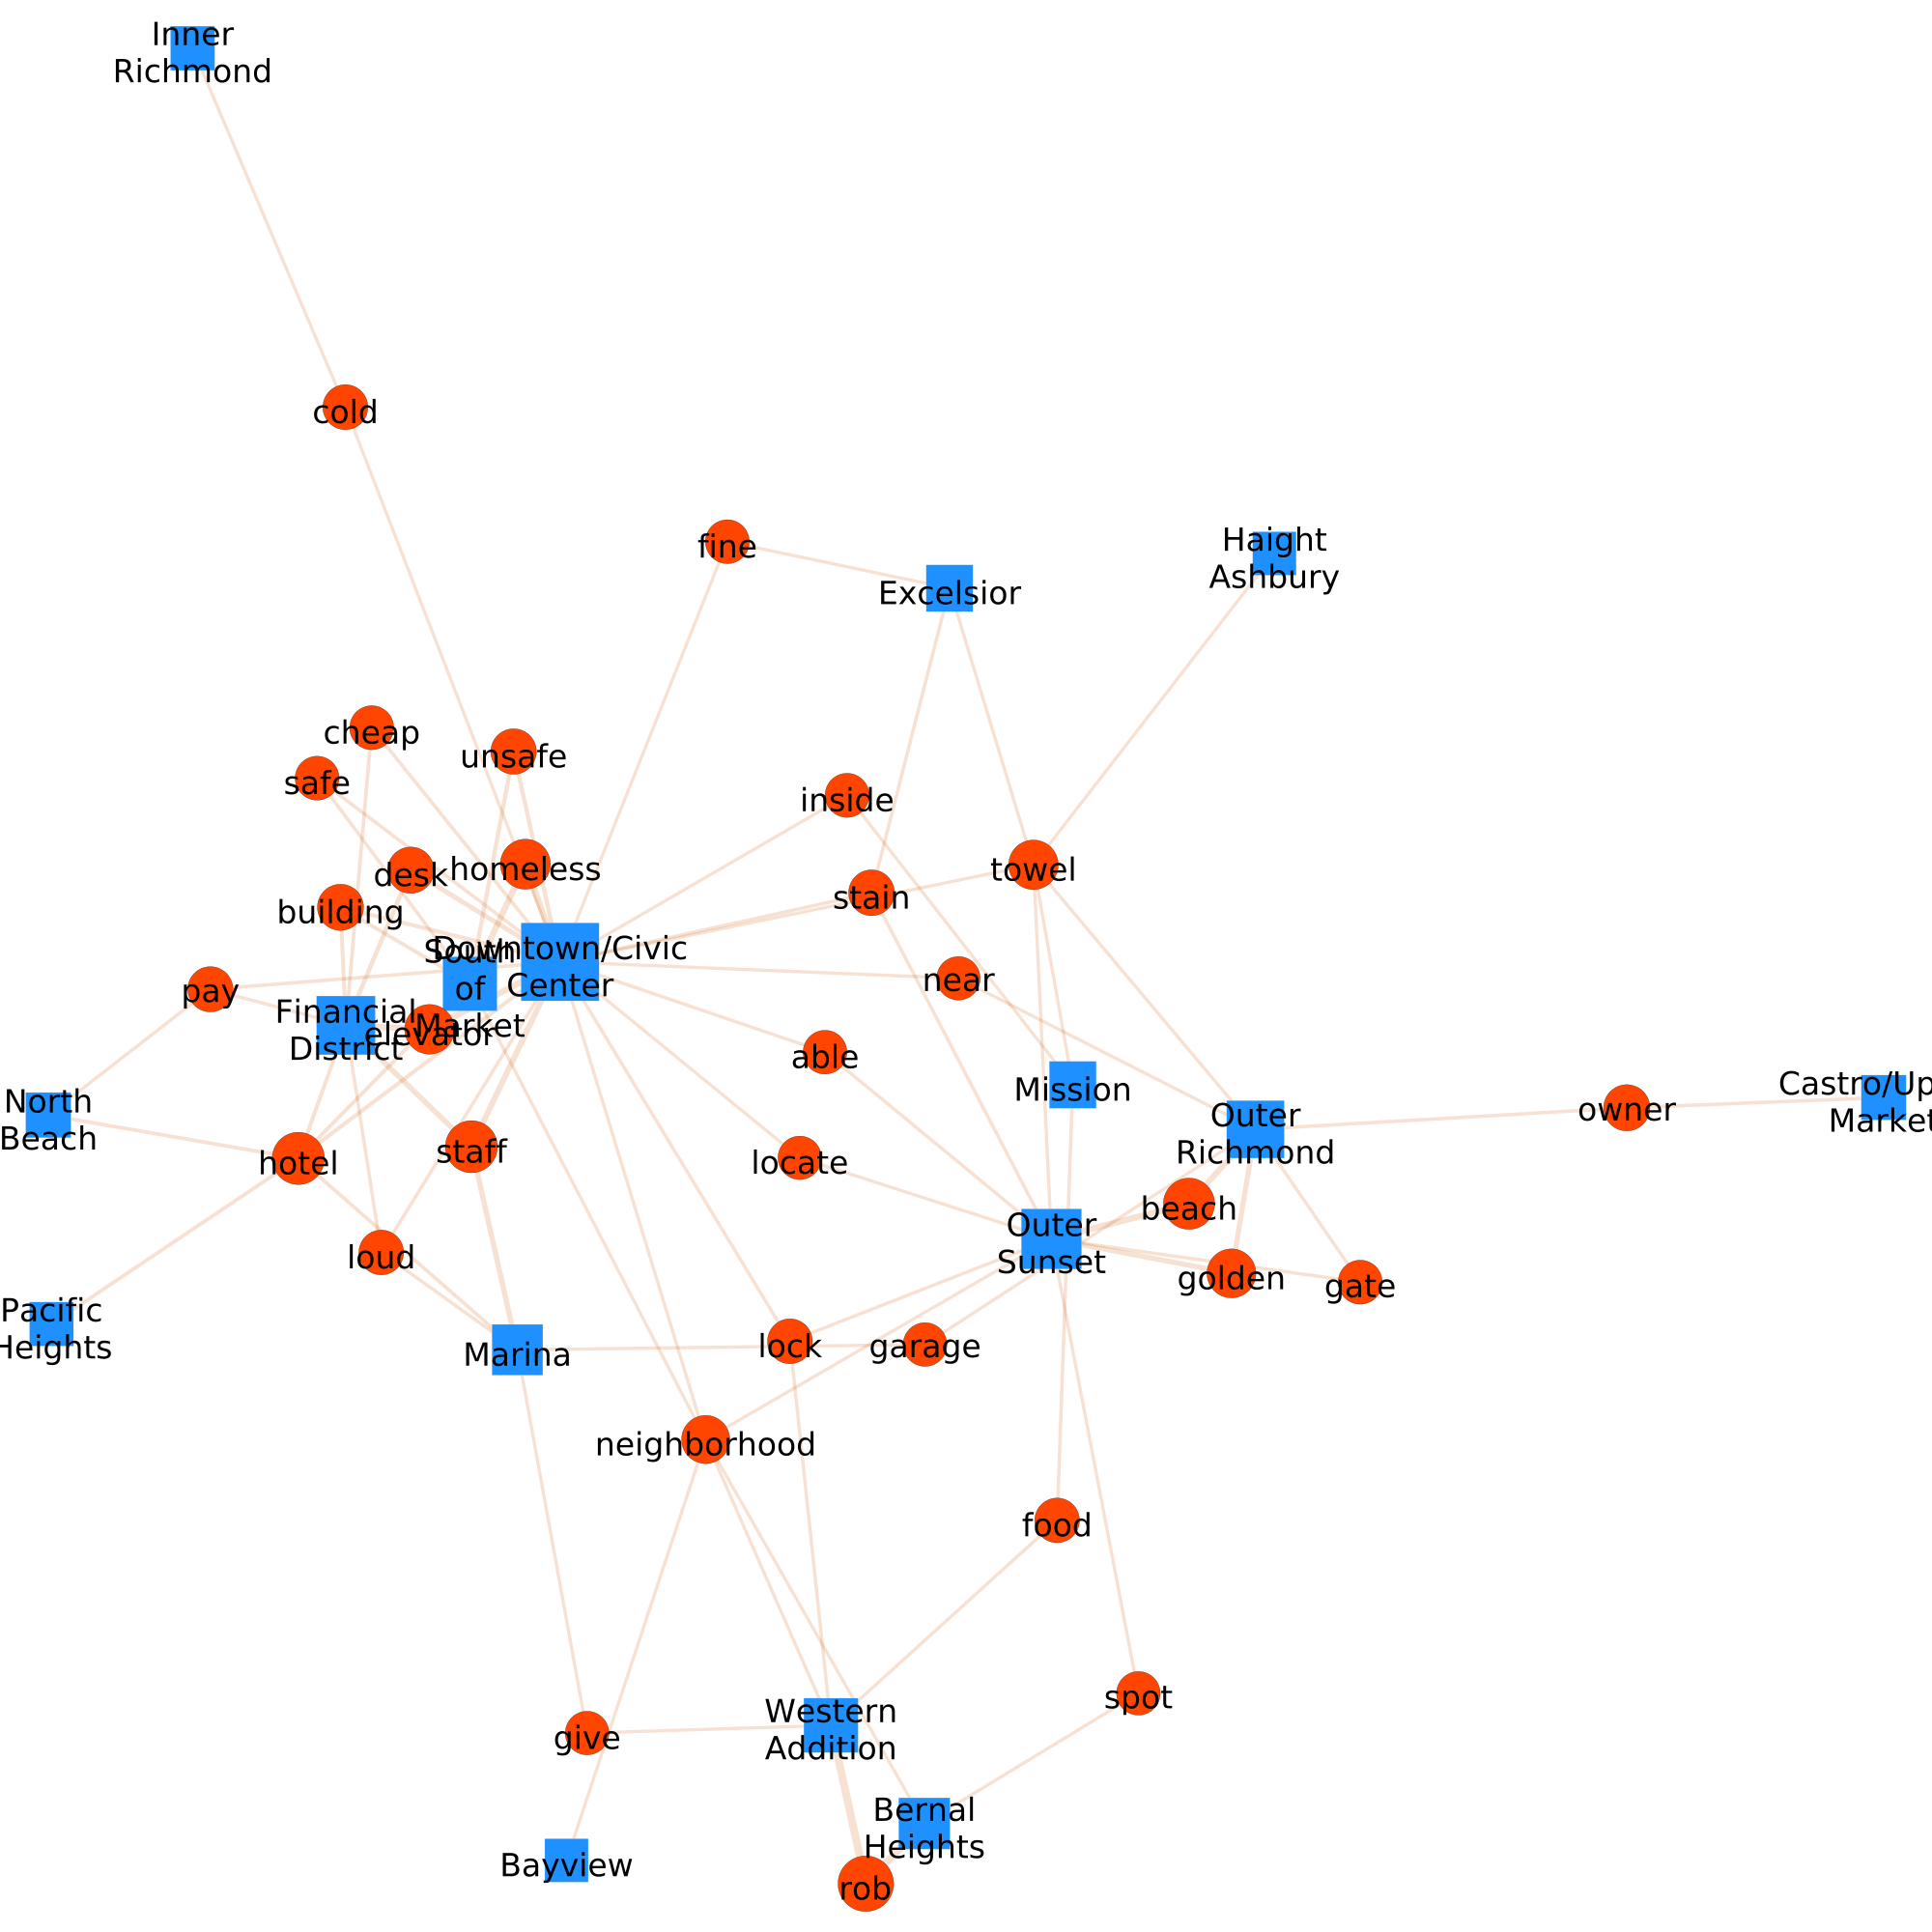

In [172]:
#Your answer here
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=15) & (DTM["term_weight"]>0.2)] #make the DTM smaller for better visualization
net = tn.Textnet(DTM_small)
net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=50,
        vertex_label_size=33, 
        edge_width=5,           # Width of edges
        edge_label_size=18,      # Size of edge labels 
        edge_color="chocolate",     # Color of edges 
        edge_opacity=0.2,
        scale_nodes_by="birank",
        scale_edges_by="weight",
        bbox=[2000,2000],
        target="SF_neg_network2000.png")

## Analysis - For Host Decription, Neighborhood Description & Host About

### VADER Sentiment Score

In [124]:
#sentiment score for column description
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for the 'description' column, imputing 0 for missing value
dfSF["desc_VADER1"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0 for s in dfSF.description]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,description_exists,neighborhood_overview_exists,host_about_exists,desc_VADER1
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000,0.5000,1,1,0,0.8807
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126,0.8126,1,1,1,0.5960
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369,0.6369,1,1,1,0.9853
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910,0.9910,1,1,1,0.3927
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000,0.5000,1,1,0,0.7964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire h

In [125]:
# Calculate sentiment scores for the 'description' column, imputing 0.5 for missing value
dfSF["desc_VADER2"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0.5 for s in dfSF.description]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,description_exists,neighborhood_overview_exists,host_about_exists,desc_VADER1,desc_VADER2
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000,0.5000,1,1,0,0.8807,0.8807
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126,0.8126,1,1,1,0.5960,0.5960
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369,0.6369,1,1,1,0.9853,0.9853
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910,0.9910,1,1,1,0.3927,0.3927
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000,0.5000,1,1,0,0.7964,0.7964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer

In [115]:
#sentiment score for column neighborhood_overview
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for the 'neighborhood_overview' column, imputing 0 for missing values
dfSF["neighborhood_overview_VADER1"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0 for s in dfSF.neighborhood_overview]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire home/apt,4,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",$159.00,7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1,1.058864e+18,12/31/23,clean place easy to access and bonus parking...,2023-12-31,82,0.600000,0.9153,0.9584,0.9584,0.9698
314118,1003920422456586658,"Victorian flat in the heart of SF, private ter...",voluminous victor

In [119]:
# Calculate sentiment scores for the 'neighborhood_overview' column, imputing 0.5 for missing values
dfSF["neighborhood_overview_VADER2"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0.5 for s in dfSF.neighborhood_overview]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire home/apt,4,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",$159.00,7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1,1.058864e+18,12/31/23,clean place easy to access and bonus parking...,2023-12-31,82,0.60000

In [117]:
#sentiment score for column host_about
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for the 'host_about' column, imputing 0 for missing values
dfSF["host_about_VADER1"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0 for s in dfSF.host_about]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire home/apt,4,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",$159.00,7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1,1.058864e+18,12/31/23,clean place easy to access and bonus parking...,2023-12-31,82,0.60000

In [120]:
# Calculate sentiment scores for the 'host_about' column, imputing 0.5 for missing values
dfSF["host_about_VADER2"] = [analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0.5 for s in dfSF.host_about]
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000,0.5000
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126,0.8126
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369,0.6369
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910,0.9910
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire home/apt,4,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",$159.00,7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1,1.058864e+18,12/31/23,clean place 

In [121]:
## Creating a dummy/binary variable indicating missingness in the 3 columns
dfSF['description_exists'] = pd.notnull(dfSF['description']).astype(int)
dfSF['neighborhood_overview_exists'] = pd.notnull(dfSF['neighborhood_overview']).astype(int)
dfSF['host_about_exists'] = pd.notnull(dfSF['host_about']).astype(int)
dfSF

,listing_id,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_exp_month,review_TextBlob,review_VADER,desc_VADER_1,desc_VADER_2,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,description_exists,neighborhood_overview_exists,host_about_exists
0,6092596,Mission Dolores Suite,enjoy a luxurious stay in this private 1bed 1b...,mission dolores is centrally located between t...,31603026,NaN,within an hour,t,1,1,t,Castro/Upper Market,37.762970,-122.426960,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",$165.00,12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,1,5.819225e+07,1/1/16,even though i did not interact with marc all t...,2016-01-01,9,0.279667,0.8977,0.8807,0.8807,0.2247,0.2247,0.0000,0.5000,1,1,0
1,3221082,Garden Apartment in Sunny Glen Park,adjecent to the sunnyside conservatory this c...,glen park village a short walk from our home ...,3151325,i am a san francisco resident and a former res...,within a few hours,f,7,10,t,Outer Mission,37.731720,-122.441080,Entire rental unit,Entire home/apt,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",$457.00,27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,1,5.822740e+07,1/1/16,one of our best airbnb experiences and we ve ...,2016-01-01,41,0.307870,0.9753,0.5960,0.5960,0.8934,0.8934,0.8126,0.8126,1,1,1
2,4907924,Beautiful Victorian: Bed/Bath,long term stays only your own bathroom and pr...,enjoy some of san francisco sunniest weather...,96655,we are a couple who love to travel connect wi...,NaN,NaN,6,10,t,Noe Valley,37.753010,-122.441658,Private room in home,Private room,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",$125.00,6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,0,5.819656e+07,1/1/16,very welcoming and friendly hosts they made u...,2016-01-01,70,0.505833,0.9587,0.9853,0.9853,0.9783,0.9783,0.6369,0.6369,1,1,1
3,9051149,Great Castro location,cozy one bedroom available in duboce triangle ...,neighborhood has good vibes and energy with lo...,47224934,hi this is your host elmer i have lived here ...,within an hour,t,1,3,t,Western Addition,37.771330,-122.436120,Private room in rental unit,Private room,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",$110.00,10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,0,5.814933e+07,1/1/16,elmer is very nice and his house is very clean...,2016-01-01,3,0.685556,0.8990,0.3927,0.3927,-0.0772,-0.0772,0.9910,0.9910,1,1,1
4,4807817,Best part of bernal,this place has a private door that opens into ...,it s quiet and close to everything,24708935,NaN,within an hour,t,2,2,t,Bernal Heights,37.740700,-122.420010,Entire home,Entire home/apt,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",$121.00,0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,2,5.816478e+07,1/1/16,lauren and dallas were so friendly and accommo...,2016-01-01,13,0.311458,0.9815,0.7964,0.7964,0.0000,0.0000,0.0000,0.5000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,Beautiful Mission Terrace Home,welcome to the mission terrace neighborhood t...,welcome to mission terrace a charming neighbo...,118600175,working professional living in the bay area ca,within an hour,f,1,1,t,Outer Mission,37.729624,-122.436041,Entire home,Entire home/apt,4,1.0,2.0,"[""Central heating"", ""Private 

### New Dataframe for Regression

In [126]:
dfSF_reg = dfSF[['listing_id','description_exists', 'neighborhood_overview_exists','host_about_exists','host_response_time','host_is_superhost','host_exp_month','desc_VADER1','neighborhood_overview_VADER1', 'host_about_VADER1','host_total_listings_count','calculated_host_listings_count_entire_homes',
                 'price','accommodates','room_type','bathrooms','beds','amenities', 'availability_30','availability_60','number_of_reviews','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_communication',
                 'review_scores_location','review_scores_value','id','timestamp', 'review_TextBlob', 'review_VADER']]
pd.set_option('display.max_columns', None)
dfSF_reg


,listing_id,description_exists,neighborhood_overview_exists,host_about_exists,host_response_time,host_is_superhost,host_exp_month,desc_VADER1,neighborhood_overview_VADER1,host_about_VADER1,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,room_type,bathrooms,beds,amenities,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,review_TextBlob,review_VADER
0,6092596,1,1,0,within an hour,t,9,0.8807,0.2247,0.0000,1,1,$165.00,2,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,5.819225e+07,2016-01-01,0.279667,0.8977
1,3221082,1,1,1,within a few hours,f,41,0.5960,0.8934,0.8126,10,1,$457.00,6,Entire home/apt,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,5.822740e+07,2016-01-01,0.307870,0.9753
2,4907924,1,1,1,NaN,NaN,70,0.9853,0.9783,0.6369,10,0,$125.00,1,Private room,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,5.819656e+07,2016-01-01,0.505833,0.9587
3,9051149,1,1,1,within an hour,t,3,0.3927,-0.0772,0.9910,3,0,$110.00,2,Private room,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,5.814933e+07,2016-01-01,0.685556,0.8990
4,4807817,1,1,0,within an hour,t,13,0.7964,0.0000,0.0000,2,2,$121.00,3,Entire home/apt,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,5.816478e+07,2016-01-01,0.311458,0.9815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,1,1,1,within an hour,f,82,0.9584,0.9698,0.0000,1,1,$159.00,4,Entire home/apt,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1.058864e+18,2023-12-31,0.600000,0.9153
314118,1003920422456586658,1,1,0,within an hour,f,2,0.0000,0.1633,0.0000,2,2,$365.00,6,Entire home/apt,2.0,4.0,"[""Central heating"", ""Hot water kettle"", ""Batht...",0,6,1,0,5.00,5.00,4.00,5.00,5.00,4.00,1.058857e+18,2023-12-31,0.388095,0.9941
314119,13332858,1,1,1,within a few hours,f,142,0.9578,0.4404,0.7717,1,1,$107.00,2,Entire home/apt,1.0,1.0,"[""Iron"", ""Elevator"", ""Refrigerator"", ""Shared p...",0,0,66,0,4.81,4.85,4.93,4.93,4.70,4.67,1.058894e+18,2023-12-31,0.095567,0.9702
314120,8356380,1,1,1,within an hour,t,99,0.8834,0.5346,0.9710,2,1,$97.00,2,Entire home/apt,1.0,1.0,"[""Central heating"", ""Private entrance"", ""Iron""...",1,2,924,8,4.94,4.97,4.96,4.97,4.71,4.91,1.058875e+18,2023-12-31,0.524603,0.9550


In [127]:
# Replace the dollar sign ('$') with an empty string ('') in the 'price' column
dfSF_reg.loc[:,'price'] = dfSF_reg['price'].str.replace('$', '')

dfSF_reg

,listing_id,description_exists,neighborhood_overview_exists,host_about_exists,host_response_time,host_is_superhost,host_exp_month,desc_VADER1,neighborhood_overview_VADER1,host_about_VADER1,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,room_type,bathrooms,beds,amenities,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,review_TextBlob,review_VADER
0,6092596,1,1,0,within an hour,t,9,0.8807,0.2247,0.0000,1,1,165.00,2,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,5.819225e+07,2016-01-01,0.279667,0.8977
1,3221082,1,1,1,within a few hours,f,41,0.5960,0.8934,0.8126,10,1,457.00,6,Entire home/apt,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,5.822740e+07,2016-01-01,0.307870,0.9753
2,4907924,1,1,1,NaN,NaN,70,0.9853,0.9783,0.6369,10,0,125.00,1,Private room,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,5.819656e+07,2016-01-01,0.505833,0.9587
3,9051149,1,1,1,within an hour,t,3,0.3927,-0.0772,0.9910,3,0,110.00,2,Private room,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,5.814933e+07,2016-01-01,0.685556,0.8990
4,4807817,1,1,0,within an hour,t,13,0.7964,0.0000,0.0000,2,2,121.00,3,Entire home/apt,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,5.816478e+07,2016-01-01,0.311458,0.9815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,1,1,1,within an hour,f,82,0.9584,0.9698,0.0000,1,1,159.00,4,Entire home/apt,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1.058864e+18,2023-12-31,0.600000,0.9153
314118,1003920422456586658,1,1,0,within an hour,f,2,0.0000,0.1633,0.0000,2,2,365.00,6,Entire home/apt,2.0,4.0,"[""Central heating"", ""Hot water kettle"", ""Batht...",0,6,1,0,5.00,5.00,4.00,5.00,5.00,4.00,1.058857e+18,2023-12-31,0.388095,0.9941
314119,13332858,1,1,1,within a few hours,f,142,0.9578,0.4404,0.7717,1,1,107.00,2,Entire home/apt,1.0,1.0,"[""Iron"", ""Elevator"", ""Refrigerator"", ""Shared p...",0,0,66,0,4.81,4.85,4.93,4.93,4.70,4.67,1.058894e+18,2023-12-31,0.095567,0.9702
314120,8356380,1,1,1,within an hour,t,99,0.8834,0.5346,0.9710,2,1,97.00,2,Entire home/apt,1.0,1.0,"[""Central heating"", ""Private entrance"", ""Iron""...",1,2,924,8,4.94,4.97,4.96,4.97,4.71,4.91,1.058875e+18,2023-12-31,0.524603,0.9550


In [128]:
# create dummy variables
columns_to_dummy = ['host_is_superhost', 'host_response_time', 'room_type']

dfSF_reg = pd.get_dummies(dfSF_reg, columns=columns_to_dummy)

#converting last 10 columns from True/False to binary
last_10_columns = dfSF_reg.columns[-10:]

# Replace boolean values with integers (1 for True and 0 for False) for the last 10 columns
dfSF_reg[last_10_columns] = dfSF_reg[last_10_columns].replace({True: 1, False: 0})

dfSF_reg


/tmp/ipykernel_111/2077789328.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSF_reg[last_10_columns] = dfSF_reg[last_10_columns].replace({True: 1, False: 0})


,listing_id,description_exists,neighborhood_overview_exists,host_about_exists,host_exp_month,desc_VADER1,neighborhood_overview_VADER1,host_about_VADER1,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms,beds,amenities,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,review_TextBlob,review_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6092596,1,1,0,9,0.8807,0.2247,0.0000,1,1,165.00,2,1.0,1.0,"[""Private entrance"", ""Bathtub"", ""Iron"", ""Refri...",12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,5.819225e+07,2016-01-01,0.279667,0.8977,0,1,0,0,0,1,1,0,0,0
1,3221082,1,1,1,41,0.5960,0.8934,0.8126,10,1,457.00,6,2.0,4.0,"[""Iron"", ""Refrigerator"", ""Fire extinguisher"", ...",27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,5.822740e+07,2016-01-01,0.307870,0.9753,1,0,0,0,1,0,1,0,0,0
2,4907924,1,1,1,70,0.9853,0.9783,0.6369,10,0,125.00,1,1.0,1.0,"[""Free dryer \u2013 In unit"", ""Bathtub"", ""Iron...",6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,5.819656e+07,2016-01-01,0.505833,0.9587,0,0,0,0,0,0,0,0,1,0
3,9051149,1,1,1,3,0.3927,-0.0772,0.9910,3,0,110.00,2,1.0,1.0,"[""Bathtub"", ""Iron"", ""Refrigerator"", ""Fire exti...",10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,5.814933e+07,2016-01-01,0.685556,0.8990,0,1,0,0,0,1,0,0,1,0
4,4807817,1,1,0,13,0.7964,0.0000,0.0000,2,2,121.00,3,1.0,2.0,"[""EV charger"", ""Iron"", ""Refrigerator"", ""Fire e...",0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,5.816478e+07,2016-01-01,0.311458,0.9815,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,1,1,1,82,0.9584,0.9698,0.0000,1,1,159.00,4,1.0,2.0,"[""Central heating"", ""Private entrance"", ""Hot w...",7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1.058864e+18,2023-12-31,0.600000,0.9153,1,0,0,0,0,1,1,0,0,0
314118,1003920422456586658,1,1,0,2,0.0000,0.1633,0.0000,2,2,365.00,6,2.0,4.0,"[""Central heating"", ""Hot water kettle"", ""Batht...",0,6,1,0,5.00,5.00,4.00,5.00,5.00,4.00,1.058857e+18,2023-12-31,0.388095,0.9941,1,0,0,0,0,1,1,0,0,0
314119,13332858,1,1,1,142,0.9578,0.4404,0.7717,1,1,107.00,2,1.0,1.0,"[""Iron"", ""Elevator"", ""Refrigerator"", ""Shared p...",0,0,66,0,4.81,4.85,4.93,4.93,4.70,4.67,1.058894e+18,2023-12-31,0.095567,0.9702,1,0,0,0,1,0,1,0,0,0
314120,8356380,1,1,1,99,0.8834,0.5346,0.9710,2,1,97.00,2,1.0,1.0,"[""Central heating"", ""Private entrance"", ""Iron""...",1,2,924,8,4.94,4.97,4.96,4.97,4.71,4.91,1.058875e+18,2023-12-31,0.524603,0.9550,0,1,0,0,0,1,1,0,0,0


In [129]:
#Count number of amenities
# Convert the string representation of the list to an actual list
dfSF_reg['amenities'] = dfSF_reg['amenities'].apply(eval)

# Count the number of items in each list
dfSF_reg['num_amenities'] = dfSF_reg['amenities'].apply(len)

dfSF_reg

,listing_id,description_exists,neighborhood_overview_exists,host_about_exists,host_exp_month,desc_VADER1,neighborhood_overview_VADER1,host_about_VADER1,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms,beds,amenities,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,review_TextBlob,review_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,num_amenities
0,6092596,1,1,0,9,0.8807,0.2247,0.0000,1,1,165.00,2,1.0,1.0,"[Private entrance, Bathtub, Iron, Refrigerator...",12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,5.819225e+07,2016-01-01,0.279667,0.8977,0,1,0,0,0,1,1,0,0,0,24
1,3221082,1,1,1,41,0.5960,0.8934,0.8126,10,1,457.00,6,2.0,4.0,"[Iron, Refrigerator, Fire extinguisher, Coffee...",27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,5.822740e+07,2016-01-01,0.307870,0.9753,1,0,0,0,1,0,1,0,0,0,33
2,4907924,1,1,1,70,0.9853,0.9783,0.6369,10,0,125.00,1,1.0,1.0,"[Free dryer – In unit, Bathtub, Iron, Refriger...",6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,5.819656e+07,2016-01-01,0.505833,0.9587,0,0,0,0,0,0,0,0,1,0,43
3,9051149,1,1,1,3,0.3927,-0.0772,0.9910,3,0,110.00,2,1.0,1.0,"[Bathtub, Iron, Refrigerator, Fire extinguishe...",10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,5.814933e+07,2016-01-01,0.685556,0.8990,0,1,0,0,0,1,0,0,1,0,42
4,4807817,1,1,0,13,0.7964,0.0000,0.0000,2,2,121.00,3,1.0,2.0,"[EV charger, Iron, Refrigerator, Fire extingui...",0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,5.816478e+07,2016-01-01,0.311458,0.9815,0,1,0,0,0,1,1,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,1,1,1,82,0.9584,0.9698,0.0000,1,1,159.00,4,1.0,2.0,"[Central heating, Private entrance, Hot water ...",7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1.058864e+18,2023-12-31,0.600000,0.9153,1,0,0,0,0,1,1,0,0,0,39
314118,1003920422456586658,1,1,0,2,0.0000,0.1633,0.0000,2,2,365.00,6,2.0,4.0,"[Central heating, Hot water kettle, Bathtub, I...",0,6,1,0,5.00,5.00,4.00,5.00,5.00,4.00,1.058857e+18,2023-12-31,0.388095,0.9941,1,0,0,0,0,1,1,0,0,0,59
314119,13332858,1,1,1,142,0.9578,0.4404,0.7717,1,1,107.00,2,1.0,1.0,"[Iron, Elevator, Refrigerator, Shared patio or...",0,0,66,0,4.81,4.85,4.93,4.93,4.70,4.67,1.058894e+18,2023-12-31,0.095567,0.9702,1,0,0,0,1,0,1,0,0,0,34
314120,8356380,1,1,1,99,0.8834,0.5346,0.9710,2,1,97.00,2,1.0,1.0,"[Central heating, Private entrance, Iron, Keyp...",1,2,924,8,4.94,4.97,4.96,4.97,4.71,4.91,1.058875e+18,2023-12-31,0.524603,0.9550,0,1,0,0,0,1,1,0,0,0,33


In [75]:
dfSF_reg.to_csv('SF_regression_data.csv', index=False)

In [35]:
dfSF_reg.columns

Index(['listing_id', 'description_exists', 'neighborhood_overview_exists',
       'host_about_exists', 'host_exp_month', 'desc_VADER',
       'neighborhood_overview_VADER', 'host_about_VADER',
       'host_total_listings_count',
       'calculated_host_listings_count_entire_homes', 'price', 'accommodates',
       'bathrooms', 'beds', 'amenities', 'availability_30', 'availability_60',
       'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'id', 'timestamp', 'review_TextBlob',
       'review_VADER', 'host_is_superhost_f', 'host_is_superhost_t',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
    

In [130]:
# Fill dummy variable columns na values with mode, and other columns na values with mean

# List of columns to exclude
exclude_columns = ['amenities', 'timestamp']

# List of columns where NaN values should be filled with mode
mode_fill_columns = ['host_is_superhost_f', 'host_is_superhost_t', 'host_response_time_a few days or more',
                     'host_response_time_within a day', 'host_response_time_within a few hours',
                     'host_response_time_within an hour', 'room_type_Entire home/apt',
                     'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room',
                     'description_exists', 'neighborhood_overview_exists', 'host_about_exists']

# List of columns where NaN values should be filled with mean
mean_fill_columns = [col for col in dfSF_reg.columns if col not in mode_fill_columns and col not in exclude_columns]

# Convert columns to numeric data type
dfSF_reg[mean_fill_columns] = dfSF_reg[mean_fill_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with mode for specified columns
for col in mode_fill_columns:
    dfSF_reg[col] = dfSF_reg[col].fillna(dfSF_reg[col].mode()[0])

# Fill NaN values with mean for other columns
for col in mean_fill_columns:
    dfSF_reg[col] = dfSF_reg[col].fillna(dfSF_reg[col].mean())

dfSF_reg


,listing_id,description_exists,neighborhood_overview_exists,host_about_exists,host_exp_month,desc_VADER1,neighborhood_overview_VADER1,host_about_VADER1,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms,beds,amenities,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,review_TextBlob,review_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,num_amenities
0,6092596,1,1,0,9,0.8807,0.2247,0.0000,1,1,165.0,2,1.0,1.0,"[Private entrance, Bathtub, Iron, Refrigerator...",12,20,775,3,4.91,4.94,4.90,4.98,4.95,4.71,5.819225e+07,2016-01-01,0.279667,0.8977,0,1,0,0,0,1,1,0,0,0,24
1,3221082,1,1,1,41,0.5960,0.8934,0.8126,10,1,457.0,6,2.0,4.0,"[Iron, Refrigerator, Fire extinguisher, Coffee...",27,57,96,0,4.78,4.89,4.80,4.85,4.78,4.75,5.822740e+07,2016-01-01,0.307870,0.9753,1,0,0,0,1,0,1,0,0,0,33
2,4907924,1,1,1,70,0.9853,0.9783,0.6369,10,0,125.0,1,1.0,1.0,"[Free dryer – In unit, Bathtub, Iron, Refriger...",6,36,51,0,4.76,4.69,4.76,4.88,4.75,4.69,5.819656e+07,2016-01-01,0.505833,0.9587,0,0,0,0,0,0,0,0,1,0,43
3,9051149,1,1,1,3,0.3927,-0.0772,0.9910,3,0,110.0,2,1.0,1.0,"[Bathtub, Iron, Refrigerator, Fire extinguishe...",10,22,786,0,4.93,4.95,4.89,4.98,4.93,4.87,5.814933e+07,2016-01-01,0.685556,0.8990,0,1,0,0,0,1,0,0,1,0,42
4,4807817,1,1,0,13,0.7964,0.0000,0.0000,2,2,121.0,3,1.0,2.0,"[EV charger, Iron, Refrigerator, Fire extingui...",0,0,37,0,4.92,4.94,4.89,4.78,4.86,4.83,5.816478e+07,2016-01-01,0.311458,0.9815,0,1,0,0,0,1,1,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314117,934254905344720840,1,1,1,82,0.9584,0.9698,0.0000,1,1,159.0,4,1.0,2.0,"[Central heating, Private entrance, Hot water ...",7,15,23,4,4.74,4.78,4.74,5.00,4.83,4.78,1.058864e+18,2023-12-31,0.600000,0.9153,1,0,0,0,0,1,1,0,0,0,39
314118,1003920422456586658,1,1,0,2,0.0000,0.1633,0.0000,2,2,365.0,6,2.0,4.0,"[Central heating, Hot water kettle, Bathtub, I...",0,6,1,0,5.00,5.00,4.00,5.00,5.00,4.00,1.058857e+18,2023-12-31,0.388095,0.9941,1,0,0,0,0,1,1,0,0,0,59
314119,13332858,1,1,1,142,0.9578,0.4404,0.7717,1,1,107.0,2,1.0,1.0,"[Iron, Elevator, Refrigerator, Shared patio or...",0,0,66,0,4.81,4.85,4.93,4.93,4.70,4.67,1.058894e+18,2023-12-31,0.095567,0.9702,1,0,0,0,1,0,1,0,0,0,34
314120,8356380,1,1,1,99,0.8834,0.5346,0.9710,2,1,97.0,2,1.0,1.0,"[Central heating, Private entrance, Iron, Keyp...",1,2,924,8,4.94,4.97,4.96,4.97,4.71,4.91,1.058875e+18,2023-12-31,0.524603,0.9550,0,1,0,0,0,1,1,0,0,0,33
